## Import Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import plot_confusion_matrix

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_curve,auc
from sklearn.utils import shuffle

import nltk
import nltk as nlp
import string
import re
import pickle

from nltk.tokenize import word_tokenize
import re
import string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import time
from tqdm.notebook import tqdm_notebook
tqdm_notebook.pandas()

# tqdm.pandas(tqdm_notebook)

wordnet = WordNetLemmatizer()
regex = re.compile('[%s]' % re.escape(string.punctuation))

## Load in and prepare datasets

In [2]:
true = pd.read_csv(r"dataset/True.csv")
fake = pd.read_csv(r"dataset/Fake.csv")

true["target"] = 0
fake["target"] = 1

df = pd.concat([true,fake])

df = shuffle(df)
df.head()

,title,text,subject,date,target
20274,POLICE IN GERMANY BEGIN RAIDS On Homes Of Face...,If Facebook has aligned themselves with German...,left-news,"Jul 15, 2016",1
9482,Wall Street bearish on Trump's call to scrap f...,WASHINGTON (Reuters) - U.S. banking lobbyists ...,politicsNews,"May 18, 2016",0
13486,“LONE SURVIVOR” MARCUS LUTTRELL’S Powerful GOP...,Marcus Luttrell gave a powerful speech last ni...,politics,"Jul 19, 2016",1
12630,THE LIST OF 65 MAINSTREAM MEDIA “Journalists” ...,Many of the hacks on this list like Rachel Mad...,politics,"Oct 24, 2016",1
6610,Bush’s Secretary Of Defense Says Trump Has No...,Former Secretary of Defense Robert Gates is no...,News,"May 1, 2016",1


## Functions

In [3]:
def basic_text_cleaning(line_from_column):
    # This function takes in a string, not a list or an array for the arg line_from_column
    
    tokenized_doc = word_tokenize(line_from_column)
    
    new_review = []
    for token in tokenized_doc:
        new_token = regex.sub(u'', token)
        if not new_token == u'':
            new_review.append(new_token)
    
    new_term_vector = []
    for word in new_review:
        if not word in stopwords.words('english'):
            new_term_vector.append(word)
    
    final_doc = []
    for word in new_term_vector:
        final_doc.append(wordnet.lemmatize(word))
    
    return ' '.join(final_doc)

def generate_roc_curve(model,y_test, probs, title):
    preds = probs[:,1]
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    
    plt.title('Receiver Operating Characteristic - {}'.format(title))
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

def plot_con_matrix(classifier,X_test,y_test):
    class_names = df["target"].value_counts()
    np.set_printoptions(precision=2)
    titles_options = [("Confusion matrix, without normalization", None),
                      ("Normalized confusion matrix", None)]
    
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
        disp.ax_.set_title(title)
        print(title)
        print(disp.confusion_matrix)

def load_up_classifier(classifier):
    x_train,x_test,y_train,y_test = train_test_split(df['text'], df["target"], test_size=0.25, random_state=2020)
    
    pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', classifier)])
    
    model = pipe.fit(x_train, y_train)
    prediction = model.predict(x_test)
    probs = model.predict_proba(x_test)
    
    plot_con_matrix(classifier=model,X_test=x_test,y_test=y_test)
    
    return model, probs, y_test

## Training classifiers without changing hyperparameters (Before text cleaning)

#### Logistic Regression

/Users/kaiz/.pyenv/versions/3.10.4/envs/py3nvim/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix, without normalization
[[5313   60]
 [  78 5774]]


/Users/kaiz/.pyenv/versions/3.10.4/envs/py3nvim/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized confusion matrix
[[5313   60]
 [  78 5774]]


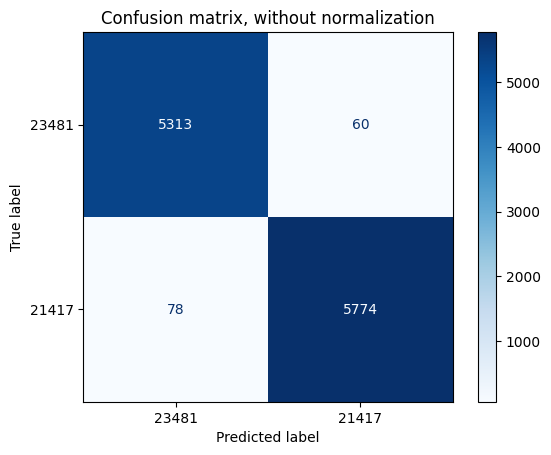

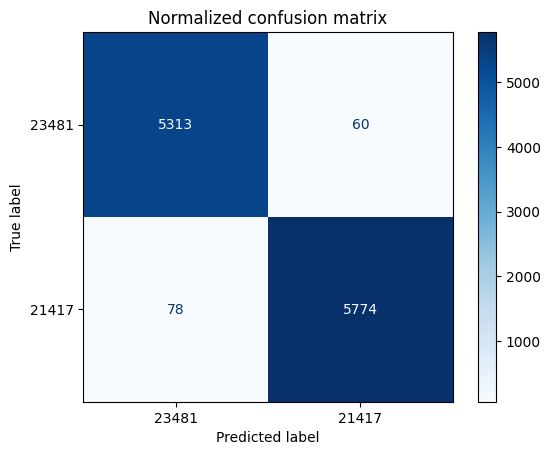

In [4]:
model_LR, probs, y_test = load_up_classifier(classifier=LogisticRegression())

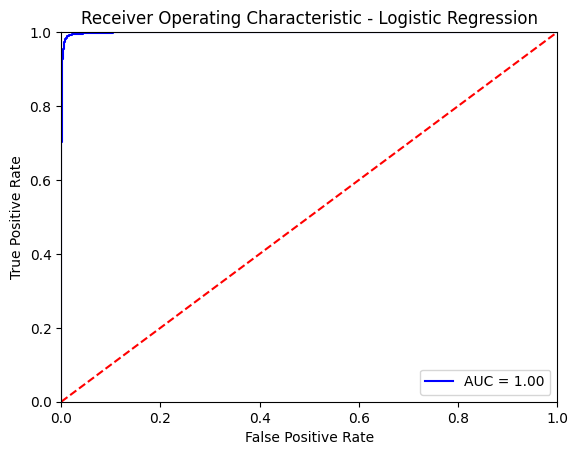

In [5]:
generate_roc_curve(model=model_LR,y_test=y_test, probs=probs, title="Logistic Regression")

#### Multinomial Naive Bayes

/Users/kaiz/.pyenv/versions/3.10.4/envs/py3nvim/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix, without normalization
[[4982  391]
 [ 291 5561]]


/Users/kaiz/.pyenv/versions/3.10.4/envs/py3nvim/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized confusion matrix
[[4982  391]
 [ 291 5561]]


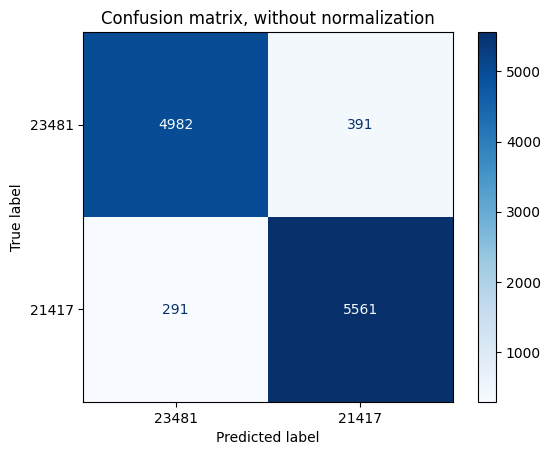

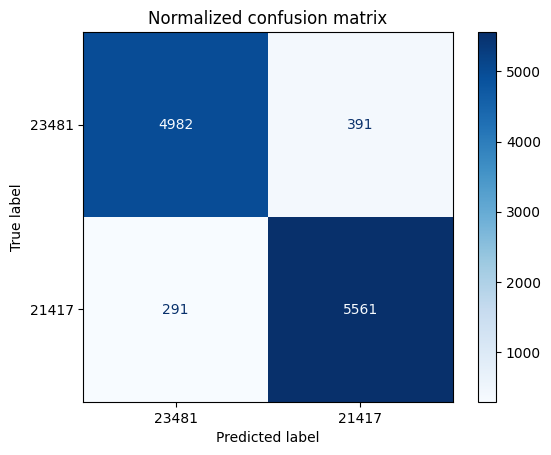

In [6]:
model_MNB, probs, y_test = load_up_classifier(classifier=MultinomialNB())

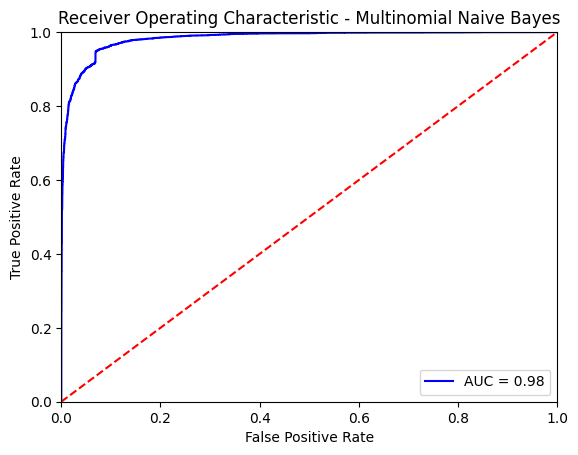

In [7]:
generate_roc_curve(model=model_MNB,y_test=y_test, probs=probs, title = "Multinomial Naive Bayes")

#### Bernoulli Naive Bayes 

/Users/kaiz/.pyenv/versions/3.10.4/envs/py3nvim/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix, without normalization
[[5193  180]
 [ 449 5403]]


/Users/kaiz/.pyenv/versions/3.10.4/envs/py3nvim/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized confusion matrix
[[5193  180]
 [ 449 5403]]


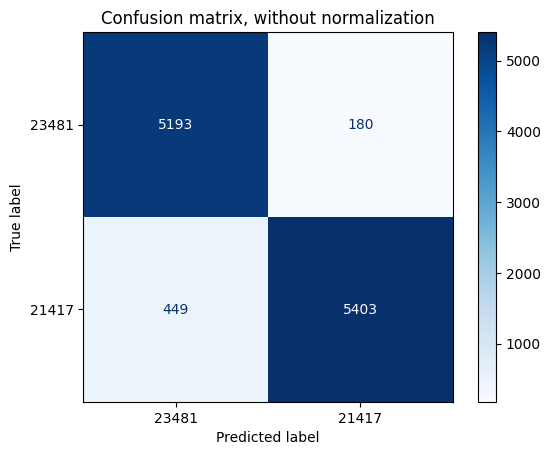

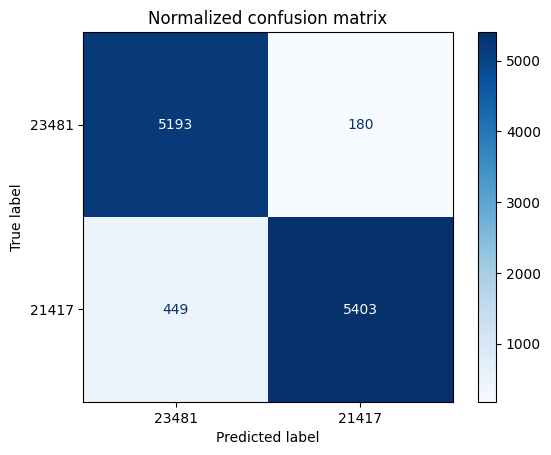

In [8]:
model_BNB, probs, y_test = load_up_classifier(classifier=BernoulliNB())

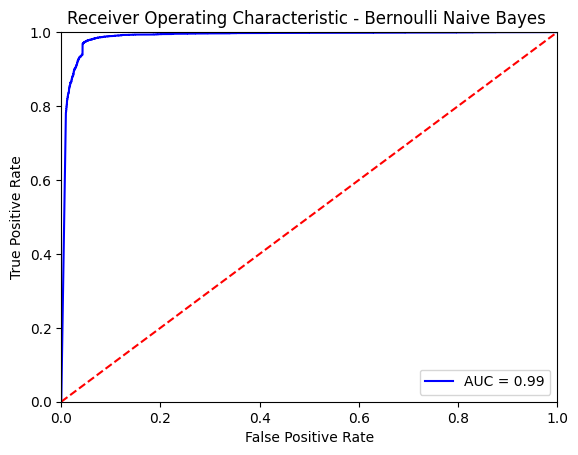

In [9]:
generate_roc_curve(model=model_BNB,y_test=y_test, probs=probs, title="Bernoulli Naive Bayes ")

#### Gradient Boost Classifier

In [ ]:
model_GBC, probs, y_test = load_up_classifier(classifier=GradientBoostingClassifier())

In [ ]:
generate_roc_curve(model=model_GBC,y_test=y_test, probs=probs, title="Gradient Boosting Classifier")

#### Decision Tree

In [ ]:
model_DT, probs, y_test = load_up_classifier(classifier=DecisionTreeClassifier())

In [ ]:
generate_roc_curve(model=model_DT,y_test=y_test, probs=probs, title="Decision Tree")

#### RFC Classifier

In [ ]:
model_RFC, probs, y_test = load_up_classifier(classifier=RandomForestClassifier())

In [ ]:
generate_roc_curve(model=model_RFC,y_test=y_test, probs=probs, title="Random Forest Classifier")

The evaluation results without tweaking hyperparameter are not too bad, we will save these models first as a backup

In [ ]:
model_file_list = [r"models/LR_model.pkl",
                   r"models/MNVBC_model.pkl",
                   r"models/BNBC_model.pkl",
                   r"models/GBC_model.pkl",
                   r"models/DT_model.pkl",
                   r"models/RFC_model.pkl"]

model_list = [model_LR,model_MNB,model_BNB,model_GBC,model_DT,model_RFC]

for model, filename in zip(model_list, model_file_list):
    pickle.dump(model, open(filename, 'wb'))

## Cleaning text data

In [ ]:
df["clean_text"] = df["text"].progress_map(basic_text_cleaning)
df.head()

## Training classifiers without changing hyperparameters

In [ ]:
def load_up_classifier_clean(classifier):
    x_train,x_test,y_train,y_test = train_test_split(df['clean_text'], df["target"], test_size=0.25, random_state=2020)
    
    pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', classifier)])
    
    model = pipe.fit(x_train, y_train)
    prediction = model.predict(x_test)
    probs = model.predict_proba(x_test)
    
    plot_con_matrix(classifier=model,X_test=x_test,y_test=y_test)
    
    return model, probs, y_test

#### Logistic Regression

In [ ]:
model_LR, probs, y_test = load_up_classifier_clean(classifier=LogisticRegression())

In [ ]:
generate_roc_curve(model=model_LR,y_test=y_test, probs=probs, title="Logistic Regression")

#### Multinomial Naive Bayes

In [ ]:
model_MNB, probs, y_test = load_up_classifier_clean(classifier=MultinomialNB())

In [ ]:
generate_roc_curve(model=model_MNB,y_test=y_test, probs=probs, title="MultinomialNB")

#### Bernoulli Naive Bayes 

In [ ]:
model_BNB, probs, y_test = load_up_classifier_clean(classifier=BernoulliNB())

In [ ]:
generate_roc_curve(model=model_BNB,y_test=y_test, probs=probs, title="Bernoulli NB")

#### Gradient Boost Classifier

In [ ]:
model_GBC, probs, y_test = load_up_classifier_clean(classifier=GradientBoostingClassifier())

In [ ]:
generate_roc_curve(model=model_GBC,y_test=y_test, probs=probs, title="Gradient Boosting Classifier")

#### Decision Tree

In [ ]:
model_DT, probs, y_test = load_up_classifier_clean(classifier=DecisionTreeClassifier())

In [ ]:
generate_roc_curve(model=model_DT,y_test=y_test, probs=probs, title="Decision Tree Classifier")

#### RFC

In [ ]:
model_RFC, probs, y_test = load_up_classifier_clean(classifier=RandomForestClassifier())

In [ ]:
generate_roc_curve(model=model_RFC,y_test=y_test, probs=probs, title="Decision Tree Classifier")